In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
df = pd.read_csv('titanic.csv')

In [111]:
df.head(9)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,Age_group
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,?,"St Louis, MO",21-30
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,?,"Montreal, PQ / Chesterville, ON",0-10
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON",0-10
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,?,135,"Montreal, PQ / Chesterville, ON",31-40
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON",21-30
5,1,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,E12,S,3,?,"New York, NY",41-50
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583,D7,S,10,?,"Hudson, NY",61-70
7,1,0,"Andrews, Mr. Thomas Jr",male,39.0000,0,0,112050,0.0000,A36,S,?,?,"Belfast, NI",31-40
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,11769,51.4792,C101,S,D,?,"Bayside, Queens, NY",51-60


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1309 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1309 non-null   float64
 9   cabin      1309 non-null   object 
 10  embarked   1309 non-null   object 
 11  boat       1309 non-null   object 
 12  body       1309 non-null   object 
 13  home.dest  1309 non-null   object 
dtypes: float64(2), int64(4), object(8)
memory usage: 143.3+ KB


In [ ]:
## change age to int/float

In [81]:
df['age'] = pd.to_numeric(df.age , errors = 'coerce')

In [61]:
df['age']=df['age'].fillna('29')

In [ ]:
## change fare to int/float

In [85]:
df['fare'] = pd.to_numeric(df.fare,errors = 'coerce')

In [65]:
df['fare']=df['fare'].fillna('33')

In [ ]:
## how many survived do we have from each passengers class

In [69]:
df.groupby('pclass')['survived'].sum()

pclass
1    200
2    119
3    181
Name: survived, dtype: int64

In [ ]:
## how many people were in each passenger class

In [71]:
df['pclass'].value_counts()

pclass
3    709
1    323
2    277
Name: count, dtype: int64

In [ ]:
## how many males and female were on the boat and how many survived

In [73]:
df['sex'].value_counts()

sex
male      843
female    466
Name: count, dtype: int64

In [75]:
df.groupby('sex')['survived'].sum()

sex
female    339
male      161
Name: survived, dtype: int64

In [ ]:
## histogram distribution of passengers age

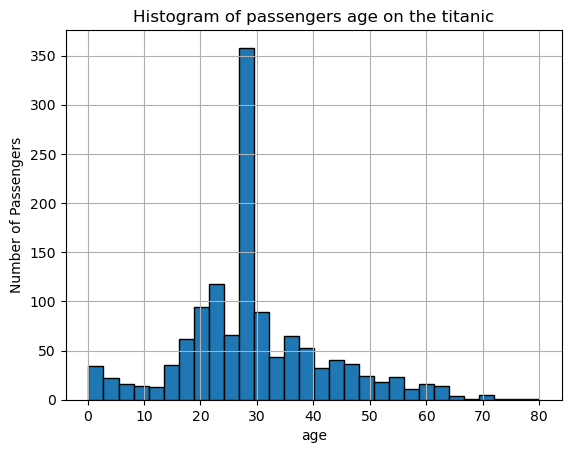

In [89]:
df['age'].hist(bins = 30, edgecolor = 'black')
plt.xlabel('age')
plt.ylabel('Number of Passengers')
plt.title('Histogram of passengers age on the titanic');

In [ ]:
## age group analysis

In [107]:
bins = [0,10,20,30,40,50,60,70,80]

labels=['0-10','11-20','21-30','31-40','41-50','51-60','61-70','71-80']

In [109]:
df['Age_group'] = pd.cut(df['age'], bins=bins,labels=labels, right=False)

In [ ]:
## comparison btw fare and pclass

In [91]:
df.groupby('pclass')['fare'].describe()

,count,mean,std,min,25%,50%,75%,max
pclass,,,,,,,,
1,323.0,87.508992,80.447178,0.0,30.6958,60.0000,107.6625,512.3292
2,277.0,21.179196,13.607122,0.0,13.0000,15.0458,26.0000,73.5000
3,709.0,13.330670,11.510034,0.0,7.7500,8.0500,15.2458,69.5500


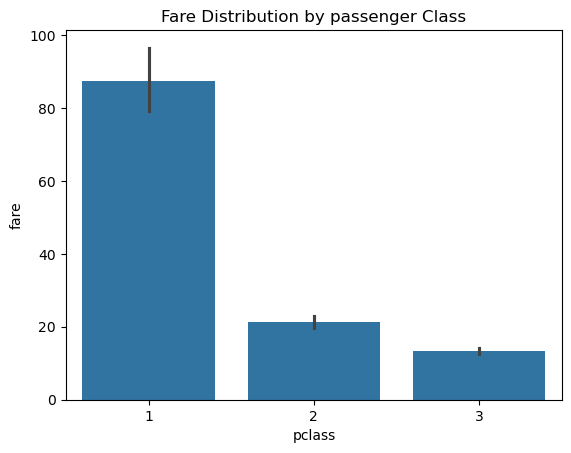

In [93]:
sns.barplot(x='pclass', y='fare',data=df)
plt.title('Fare Distribution by passenger Class');

In [ ]:
## 1st class has higher fares 
## 2nd class has moderate fares 
## 3rd class has lower fares